In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
import unicodedata

import os
import glob

In [28]:
raw_data_path = os.path.join('data', 'raw')
all_files = glob.glob(raw_data_path +"/prov_top_songs_with_lyrics.csv")
tweets_df = pd.concat(pd.read_csv(f) for f in all_files)
#tweets_df = pd.read_csv('data/raw/top_songs_with_lyrics.csv', encoding = 'latin1')
tweets_df.head(20)
columnLyric='lyric'

In [29]:
tweets_df = tweets_df[tweets_df[columnLyric].isnull()==False]
tweets_df.head(10)

,N°,artists,explicit,genre,lyric,musixmatch_rating,rank,title,Violencia verbal,Violencia Física,Violencia Psicológica,Violencia Sexual,VIolencia Económica,Violencia Simbólica,Apto para niñxs,clase,Observacion
1,2,"SECH, DADDY YANKEE, J BALVIN FEATURING ROSALIA...",1.0,NaN,"Ahora todo cambió, le toca a ella\nLatino gang...",90.0,2,RELACION,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,NaN
3,4,OZUNA,0.0,Latin / Pop in Spanish,"Woh-oh-oh-oh (Dime, ma')\nBaby, baby\nOzuna\n\...",79.0,4,CARAMELO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,NaN
5,6,KAROL G,0.0,NaN,"Ovy On The Drums\nYa no te estaba buscando, ba...",80.0,6,"AY, DIOS MIO!",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
6,7,BLACK EYED PEAS X J BALVIN,1.0,Latin / Pop in Spanish,"This is the rhythm, rhythm, rhythm, rhythm\nTh...",82.0,8,RITMO (BAD BOYS FOR LIFE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
7,8,TAINY X J BALVIN,0.0,Music,(SpongeBob SquarePants)\n(SpongeBob SquarePant...,80.0,9,AGUA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
8,9,"OZUNA, DOJA CAT & SIA",1.0,NaN,Ah-ah-ah-oh-oh-oh\nAh-ah-ah-oh-oh\nYeah-eh\nAh...,81.0,10,DEL MAR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
9,10,"BLACK EYED PEAS, OZUNA + J.REY SOUL",1.0,NaN,"Baby, ven conmigo (ven conmigo)\nBaila (baila)...",26.0,11,MAMACITA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,NaN
10,11,LOS DOS CARNALES,0.0,Music,"Pocas amistades, a la más sincera la llevo en ...",74.0,12,EL ENVIDIOSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
13,14,ROSALIA & TRAVIS SCOTT,1.0,Music,"Cosa' de familia, no la' tienen que escucha'\n...",81.0,15,TKN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
14,15,FARRUKO,1.0,NaN,A ella ya no le motiva salir\nQuedó traumada\n...,30.0,16,LA TOXICA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN


PREPROCESING

In [30]:
!pip3 install es_core_news_md
!python -m spacy download es_core_news_md
#import spacy
#nlp = spacy.load('es_core_news_md')

[+] Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [31]:
import re
import string

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')

import es_core_news_md

nlp = es_core_news_md.load()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leow_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leow_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
import spacy
import es_core_news_md

nlp = es_core_news_md.load()
#doc = nlp("ahora todo cambió le toca a ella latino gang  ayer la vi perreando solita  se ve má bonita ahora que no está")
#for token in doc: print(token.text, "|", token.lemma_, '|', token.pos_)

In [33]:
## Agregar Lematizacion o Stemming 
## Agregar remover acentos 
## completar lista de stop words 

def lemmatize(lyric):
    tk = nlp(lyric)
    tk_lemmatize = ""
    for word in tk:
        tk_lemmatize = tk_lemmatize +" "+word.lemma_
    return tk_lemmatize
    

def token_clean_stopwords(message):
    stop_words = stopwords.words('spanish') + stopwords.words('english')
    more_stopwords = ['rhythm','ovy','ay','hey','woh','si', 'pa', 'sé', 'solo', 'yeah', 'yeh', 'oh', 'i', 'to', 'va', 'the', 'aunque', 'you', 'eh', 'cómo','ma']
    total_stopwords = stop_words + more_stopwords
    text_token_stopwords = [word for word in message.split() if ((word.lower() not in total_stopwords) and (len(word)>4))]
    return text_token_stopwords

def remove_puntuation(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join = remove_accents(Test_punc_removed_join)
    return Test_punc_removed_join

def remove_accents(input_str):
    """
    remueve acentos, aunque al ser un texto en inglés no deberían existir acentos
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str )
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def clean_str_puntuaction(input_df):
    input_df=input_df.replace("'","")
    input_df=input_df.replace("\r"," ")
    input_df=input_df.replace("\n"," ")
    input_df=input_df.replace("-"," ")
    input_df= re.sub("[\(\[].*?[\)\]]", "", input_df)
    input_df= re.sub(r'[^\w\s]', '', input_df)
    #input_df= remove_accents(input_df)
    return input_df

def clean_lyric(input_lyric):
    input_lyric = clean_str_puntuaction(input_lyric)
    #input_lyric = remove_puntuation(input_lyric)
    
    input_lyric = lemmatize(input_lyric)
    
    input_lyric = remove_accents(input_lyric)
    
    input_lyric = token_clean_stopwords(input_lyric)
    
    return input_lyric
    
    

In [34]:
columnLyric='lyric'
df=tweets_df[columnLyric].str.lower()
for i, j in df.items():
    df[i]=clean_lyric(j)
tweets_df[columnLyric]=df
tweets_df.head()

,N°,artists,explicit,genre,lyric,musixmatch_rating,rank,title,Violencia verbal,Violencia Física,Violencia Psicológica,Violencia Sexual,VIolencia Económica,Violencia Simbólica,Apto para niñxs,clase,Observacion
1,2,"SECH, DADDY YANKEE, J BALVIN FEATURING ROSALIA...",1.0,NaN,"[ahora, cambiar, tocar, latinar, perreando, so...",90.0,2,RELACION,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,NaN
3,4,OZUNA,0.0,Latin / Pop in Spanish,"[ozuna, poder, tener, curiosidad, pretender, q...",79.0,4,CARAMELO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,NaN
5,6,KAROL G,0.0,NaN,"[drums, buscar, coincidir, coser, conquistando...",80.0,6,"AY, DIOS MIO!",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
6,7,BLACK EYED PEAS X J BALVIN,1.0,Latin / Pop in Spanish,"[night, noche, rompemo, volvemo, saber, hacemo...",82.0,8,RITMO (BAD BOYS FOR LIFE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
7,8,TAINY X J BALVIN,0.0,Music,"[party, debajo, aguar, buscar, paragua, bailar...",80.0,9,AGUA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN


In [35]:
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 1 to 555
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   N°                     412 non-null    int64  
 1   artists                412 non-null    object 
 2   explicit               412 non-null    float64
 3   genre                  246 non-null    object 
 4   lyric                  412 non-null    object 
 5   musixmatch_rating      412 non-null    float64
 6   rank                   412 non-null    int64  
 7   title                  412 non-null    object 
 8   Violencia verbal       412 non-null    float64
 9   Violencia Física       412 non-null    float64
 10  Violencia Psicológica  410 non-null    float64
 11  Violencia Sexual       411 non-null    float64
 12  VIolencia Económica    411 non-null    float64
 13  Violencia Simbólica    410 non-null    float64
 14  Apto para niñxs        411 non-null    float64
 15  clase 

In [36]:
tweets_df = tweets_df[tweets_df['lyric'].isnull()==False]
tweets_df = tweets_df[tweets_df['clase'].isnull()== False]
tweets_df = tweets_df[['lyric','clase']]
tweets_df.head()


,lyric,clase
1,"[ahora, cambiar, tocar, latinar, perreando, so...",1
3,"[ozuna, poder, tener, curiosidad, pretender, q...",1
5,"[drums, buscar, coincidir, coser, conquistando...",0
6,"[night, noche, rompemo, volvemo, saber, hacemo...",0
7,"[party, debajo, aguar, buscar, paragua, bailar...",0


array([[<AxesSubplot:title={'center':'clase'}>]], dtype=object)

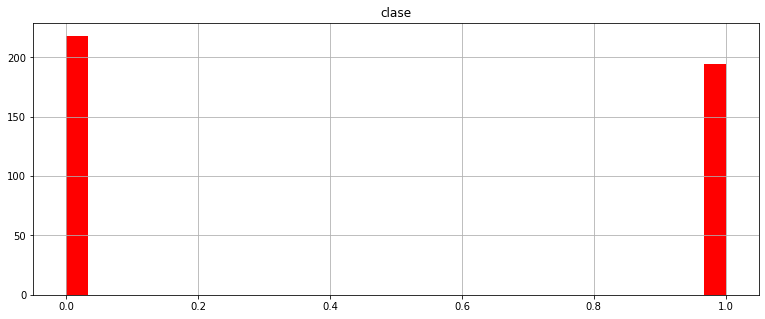

In [37]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

<AxesSubplot:xlabel='clase', ylabel='count'>

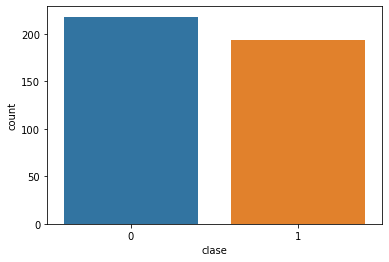

In [38]:
sns.countplot(tweets_df['clase'], label = 'Count')

In [39]:
tweets_df['length'] = tweets_df['lyric'].apply(len)
tweets_df

,lyric,clase,length
1,"[ahora, cambiar, tocar, latinar, perreando, so...",1,72
3,"[ozuna, poder, tener, curiosidad, pretender, q...",1,58
5,"[drums, buscar, coincidir, coser, conquistando...",0,24
6,"[night, noche, rompemo, volvemo, saber, hacemo...",0,47
7,"[party, debajo, aguar, buscar, paragua, bailar...",0,39
...,...,...,...
548,"[tener, control, acceso, corazon, querer, habl...",1,33
550,"[nacer, fortuna, nadar, desafiar, destinar, fr...",1,33
551,"[manuel, turizo, quiereme, mientras, poder, ro...",1,44
552,"[color, despertar, interes, tener, ganar, vert...",1,25


<AxesSubplot:ylabel='Frequency'>

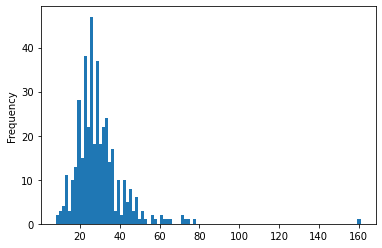

In [40]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [42]:
tweets_df.describe()

,clase,length
count,412.000000,412.00000
mean,0.470874,29.42233
std,0.499758,12.64435
min,0.000000,8.00000
25%,0.000000,22.00000
50%,0.000000,27.00000
75%,1.000000,34.00000
max,1.000000,161.00000


In [44]:
tweets_df[tweets_df['length'] == 72]['lyric'].iloc[0]

['ahora',
 'cambiar',
 'tocar',
 'latinar',
 'perreando',
 'solita',
 'bonito',
 'ahora',
 'felicidad',
 'comer',
 'quito',
 'siempre',
 'dolor',
 'matar',
 'necesitar',
 'sonreir',
 'mientra',
 'enrolar',
 'decir',
 'falto',
 'actitud',
 'relacion',
 'hacer',
 'mandar',
 'decir',
 'ahora',
 'cambiar',
 'tocar',
 'botella',
 'gracia',
 'maltratar',
 'poner',
 'bello',
 'ahora',
 'querer',
 'querer',
 'ahora',
 'cambiar',
 'tocar',
 'party',
 'botella',
 'gracia',
 'maltratar',
 'poner',
 'bello',
 'ahora',
 'querer',
 'querer',
 'ahora',
 'querer',
 'grabar',
 'vacilar',
 'ensenar',
 'gustar',
 'seguir',
 'patrone',
 'patron',
 'princecita',
 'buscate',
 'fiona',
 'finar',
 'semana',
 'party',
 'party',
 'seguir',
 'matar',
 'ganar',
 'botella',
 'dejar',
 'decir',
 'seguir',
 'tirar']

In [45]:
positive = tweets_df[tweets_df['clase']==0]
positive

,lyric,clase,length
5,"[drums, buscar, coincidir, coser, conquistando...",0,24
6,"[night, noche, rompemo, volvemo, saber, hacemo...",0,47
7,"[party, debajo, aguar, buscar, paragua, bailar...",0,39
10,"[amistad, sincero, llevar, listo, amigo, ayuda...",0,34
13,"[coser, familia, tener, escuchar, capar, capar...",0,37
...,...,...,...
431,"[soltar, selecto, grupo, bueno, parir, sufrir,...",0,26
440,"[sentir, poder, desesperar, sentir, haber, pen...",0,17
441,"[poder, despertarte, manana, recorrer, contigo...",0,19
444,"[decidete, saber, ofrecer, sushi, timar, camin...",0,24


In [46]:
negative = tweets_df[tweets_df['clase']==1]
negative

,lyric,clase,length
1,"[ahora, cambiar, tocar, latinar, perreando, so...",1,72
3,"[ozuna, poder, tener, curiosidad, pretender, q...",1,58
8,"[ozuna, perder, arenar, tarar, sonar, tropical...",1,36
9,"[conmigo, bailar, musico, testigo, mamacita, l...",1,49
14,"[motivo, salir, quedar, traumada, todavia, pen...",1,56
...,...,...,...
548,"[tener, control, acceso, corazon, querer, habl...",1,33
550,"[nacer, fortuna, nadar, desafiar, destinar, fr...",1,33
551,"[manuel, turizo, quiereme, mientras, poder, ro...",1,44
552,"[color, despertar, interes, tener, ganar, vert...",1,25


In [57]:
lyric = tweets_df['lyric']
sentences_as_one_string = ""
for word in lyric:
    sentences_as_one_string =sentences_as_one_string+" ".join(word)


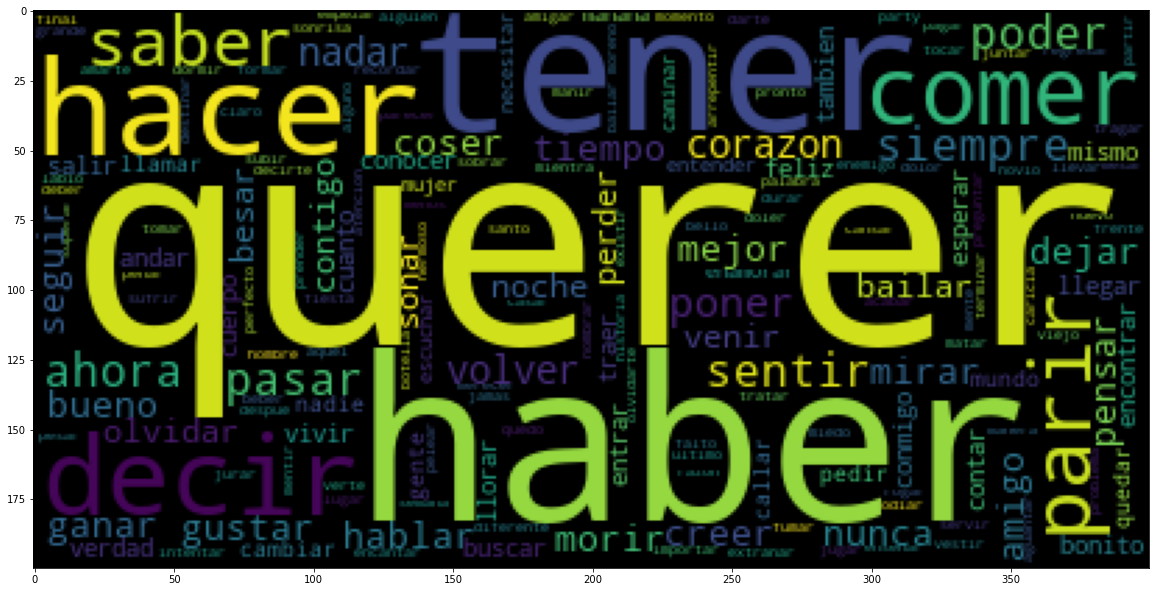

In [60]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

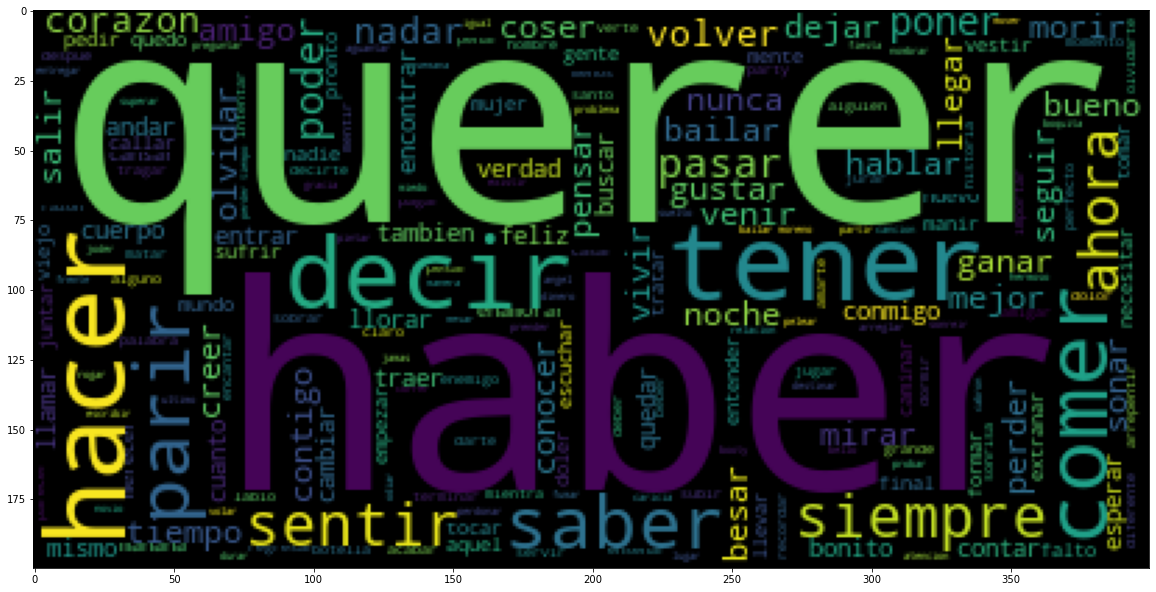

In [61]:
#negative_list = negative['lyric'].tolist()
#negative_sentences_as_one_string = " ".join(negative_list)
lyric = negative['lyric']
negative_sentences_as_one_string = ""
for word in lyric:
    negative_sentences_as_one_string =negative_sentences_as_one_string+" ".join(word)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

In [62]:
#tweets_df_clean = tweets_df['lyric'].apply(message_cleaning)

NameError: name 'message_cleaning' is not defined

In [116]:
tweets_df_clean

1      [Ahora, cambi, toca, Latino, gang, Ayer, vi, ...
3      [Wohohohoh, Dime, ma, Baby, baby, Ozuna, Aunqu...
5      [Ovy, On, The, Drums, buscando, babe, coincidi...
6      [This, is, the, rhythm, rhythm, rhythm, rhythm...
7      [SpongeBob, SquarePants, SpongeBob, SquarePant...
                             ...                        
587    [T, amor, consentido, hace, soar, ojos, boni...
588    [das, beso, cachete, vez, volver, ser, amigos,...
591    [veo, venir, acercas, Quiero, besar, boca, emp...
592    [pasa, chavela, noto, cansada, pasa, chavela, ...
595    [ADnde, quedaron, Todas, aquellas, promesas, ...
Name: lyric, Length: 434, dtype: object

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['lyric'])

NameError: name 'message_cleaning' is not defined

In [118]:
print(vectorizer.get_feature_names())

['1', '10', '100', '15', '16', '20', '21', '29', '3', '45', '69', 'AA', 'AAh', 'AApoco', 'AAs\x92', 'AAy', 'ABlep', 'ACon', 'ACuando', 'ACu\x87les', 'ACu\x87ndo', 'ACu\x87ntas', 'ACu\x87nto', 'ACu\x87ntos', 'AC\x87llate', 'AC\x97mo', 'ADaddy', 'ADe', 'ADime', 'ADuro', 'AD\x97nde', 'AEl', 'AEn', 'AFarru', 'AFea', 'AHace', 'AHey', 'AJunto', 'AJ\x87lese', 'AMe', 'ANacho', 'AOh', 'APa', 'APara', 'APero', 'APor', 'APrende', 'AQue', 'AQui\x8en', 'AQu\x8e', 'AR\x9cmbale', 'ASalucita', 'ASalud', 'ASe', 'ASer\x87', 'ASube', 'ATamos', 'ATar\x8e', 'AT\x9c', 'AVas', 'AVerdad', 'AY', 'Aacaso', 'Aay', 'Abayarde', 'Abranle', 'Abusa', 'Aceptalo', 'Aclaremos', 'Acomp\x87\x96ame', 'Acordando', 'Acostumbrado', 'Acostumbr\x87ndome', 'Acura', 'Ac\x87', 'Ac\x97mo', 'Adale', 'Adentro', 'Adida', 'Admitelo', 'Adoro', 'Aduro', 'Ad\x87n', 'Afortunado', 'Agradecido', 'Agradezco', 'Agua', 'Agu\x87ntate', 'Ah', 'Ahah', 'Ahahah', 'Ahahahohoh', 'Ahahahohohoh', 'Ahahahyayayo', 'Ahora', 'Ah\x92', 'Alann', 'Alaska', 'Al

In [119]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [120]:

tweets = pd.DataFrame(tweets_countvectorizer.toarray())


In [121]:
X = tweets

In [122]:
X.shape
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5809,5810,5811,5812,5813,5814,5815,5816,5817,5818
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:

y=tweets_df['clase']


In [124]:
y.shape

(434,)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [126]:
## Utilizar otros sklearn log reg, SVM, XGBoost, Bin Tree, Random Forest

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

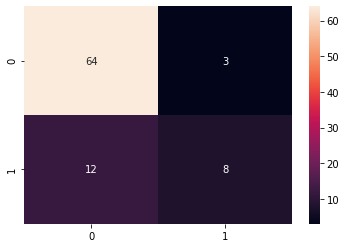

In [128]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [129]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90        67
         1.0       0.73      0.40      0.52        20

    accuracy                           0.83        87
   macro avg       0.78      0.68      0.71        87
weighted avg       0.82      0.83      0.81        87

